# Validation of main.find_steady_state()

In [1]:
import numpy as np
import numpy.matlib as npm
import json
import matplotlib.pyplot as plt
from matplotlib import rc
import copy
import warnings
import scipy
from scipy import sparse
from tqdm.notebook import tqdm
import importlib as imp
import random

import main_cd as main
import main_cd_plots as pltm

# Dark background?
dark = True
if dark==True:
    plt.style.use('dark_background')
    main_color = 'w'
else:
    plt.style.use('default')
    main_color = 'k'
    
# Latex
from matplotlib import rc
rc('text', usetex=True)
plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

---

# Tests

Here, we perform some basic tests to check that main.find_steady_state() works as intended.

Note that the way to play with the "tolerance" is to change the definition of the error bars (i.e., the interval of confidence): if we use a 99% interval of confidence we are more likely to stop before reaching the true steady state (and thinking we reached it), rather than if we use a 84% interval of confidence.

shrinking


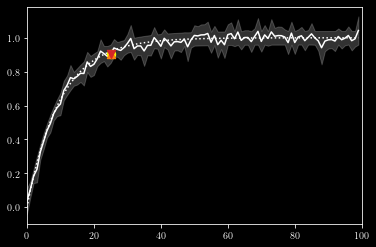

In [56]:
np.random.seed(3)
window_type = 'shrinking'
print(window_type)

# Exact function
x = np.linspace(0,10,100)
y = 1-np.exp(-x)
plt.plot(y,':',color=main_color,zorder=-5)
plt.xlim(0,len(x))

# Noise
std = 0.02
avg_noise = np.random.normal(0,std,len(x))
y = y + avg_noise
errors = np.abs(avg_noise)+2*std # This is arbitrary
plt.plot(y,color=main_color,zorder=-5)
plt.fill_between(range(len(x)), y+errors, y-errors, color=main_color, alpha=0.2)


imp.reload(main)

# Test 1
window = 5
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='yellow',s=70,marker='o')

# Test 2
window = 10
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:orange',s=70,marker='^')

# Test 3
window = 20
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:red',s=70,marker='v')

shrinking
error/1.5


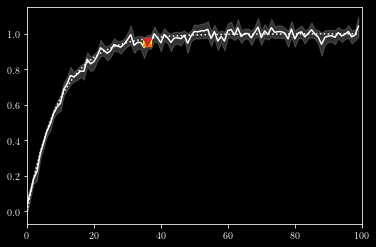

In [68]:
np.random.seed(3)
window_type = 'shrinking'
print(window_type)

# Exact function
x = np.linspace(0,10,100)
y = 1-np.exp(-x)
plt.plot(y,':',color=main_color,zorder=-5)
plt.xlim(0,len(x))

# Noise
std = 0.02
avg_noise = np.random.normal(0,std,len(x))
y = y + avg_noise
errors = (np.abs(avg_noise)+2*std)/1.5 # This is arbitrary
print('error/1.5')
plt.plot(y,color=main_color,zorder=-5)
plt.fill_between(range(len(x)), y+errors, y-errors, color=main_color, alpha=0.2)


imp.reload(main)

# Test 1
window = 5
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='yellow',s=70,marker='o')

# Test 2
window = 10
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:orange',s=70,marker='^')

# Test 3
window = 20
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:red',s=70,marker='v')

sliding


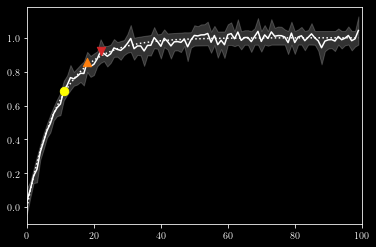

In [57]:
np.random.seed(3)
window_type = 'sliding'
print(window_type)

# Exact function
x = np.linspace(0,10,100)
y = 1-np.exp(-x)
plt.plot(y,':',color=main_color,zorder=-5)
plt.xlim(0,len(x))

# Noise
std = 0.02
avg_noise = np.random.normal(0,std,len(x))
y = y + avg_noise
errors = np.abs(avg_noise)+2*std # This is arbitrary
plt.plot(y,color=main_color,zorder=-5)
plt.fill_between(range(len(x)), y+errors, y-errors, color=main_color, alpha=0.2)


imp.reload(main)

# Test 1
window = 5
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='yellow',s=70,marker='o')

# Test 2
window = 10
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:orange',s=70,marker='^')

# Test 3
window = 20
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:red',s=70,marker='v')

### Test 2

shrinking


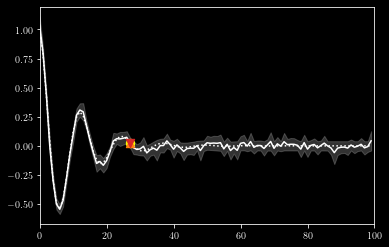

In [58]:
np.random.seed(3)
window_type = 'shrinking'
print(window_type)

# Exact function
x = np.linspace(0,10,100)
y = np.cos(5*x)*np.exp(-x)
plt.plot(y,':',color=main_color,zorder=-5)
plt.xlim(0,len(x))

# Noise
std = 0.02
avg_noise = np.random.normal(0,std,len(x))
y = y + avg_noise
errors = np.abs(avg_noise)+2*std # This is arbitrary
plt.plot(y,color=main_color,zorder=-5)
plt.fill_between(range(len(x)), y+errors, y-errors, color=main_color, alpha=0.2)


imp.reload(main)

# Test 1
window = 5
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='yellow',s=70,marker='o')

# Test 2
window = 10
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:orange',s=70,marker='^')

# Test 3
window = 20
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:red',s=70,marker='v')

shrinking
error/1.5


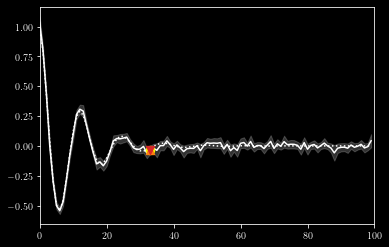

In [69]:
np.random.seed(3)
window_type = 'shrinking'
print(window_type)

# Exact function
x = np.linspace(0,10,100)
y = np.cos(5*x)*np.exp(-x)
plt.plot(y,':',color=main_color,zorder=-5)
plt.xlim(0,len(x))

# Noise
std = 0.02
avg_noise = np.random.normal(0,std,len(x))
y = y + avg_noise
errors = (np.abs(avg_noise)+2*std)/1.5 # This is arbitrary
print('error/1.5')
plt.plot(y,color=main_color,zorder=-5)
plt.fill_between(range(len(x)), y+errors, y-errors, color=main_color, alpha=0.2)


imp.reload(main)

# Test 1
window = 5
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='yellow',s=70,marker='o')

# Test 2
window = 10
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:orange',s=70,marker='^')

# Test 3
window = 20
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:red',s=70,marker='v')

sliding


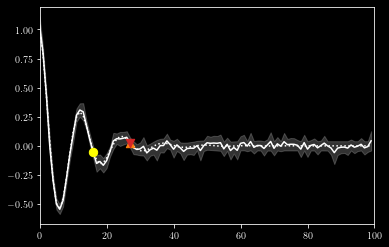

In [59]:
np.random.seed(3)
window_type = 'sliding'
print(window_type)

# Exact function
x = np.linspace(0,10,100)
y = np.cos(5*x)*np.exp(-x)
plt.plot(y,':',color=main_color,zorder=-5)
plt.xlim(0,len(x))

# Noise
std = 0.02
avg_noise = np.random.normal(0,std,len(x))
y = y + avg_noise
errors = np.abs(avg_noise)+2*std # This is arbitrary
plt.plot(y,color=main_color,zorder=-5)
plt.fill_between(range(len(x)), y+errors, y-errors, color=main_color, alpha=0.2)


imp.reload(main)

# Test 1
window = 5
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='yellow',s=70,marker='o')

# Test 2
window = 10
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:orange',s=70,marker='^')

# Test 3
window = 20
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:red',s=70,marker='v')

### Test 3

shrinking


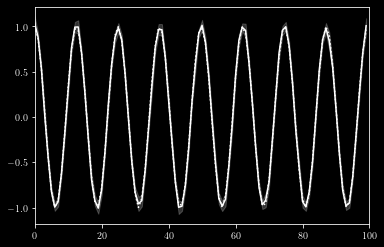

In [60]:
np.random.seed(3)
window_type = 'shrinking'
print(window_type)

# Exact function
x = np.linspace(0,10,100)
y = np.cos(5*x)
plt.plot(y,':',color=main_color,zorder=-5)
plt.xlim(0,len(x))

# Noise
std = 0.02
avg_noise = np.random.normal(0,std,len(x))
y = y + avg_noise
errors = np.abs(avg_noise)+2*std # This is arbitrary
plt.plot(y,color=main_color,zorder=-5)
plt.fill_between(range(len(x)), y+errors, y-errors, color=main_color, alpha=0.2)


imp.reload(main)

# Test 1
window = 5
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='yellow',s=70,marker='o')

# Test 2
window = 10
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:orange',s=70,marker='^')

# Test 3
window = 20
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:red',s=70,marker='v')

sliding


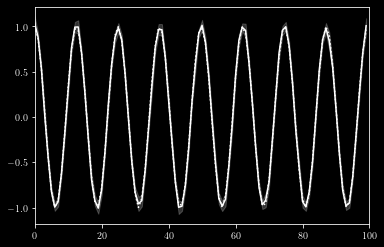

In [61]:
np.random.seed(3)
window_type = 'sliding'
print(window_type)

# Exact function
x = np.linspace(0,10,100)
y = np.cos(5*x)
plt.plot(y,':',color=main_color,zorder=-5)
plt.xlim(0,len(x))

# Noise
std = 0.02
avg_noise = np.random.normal(0,std,len(x))
y = y + avg_noise
errors = np.abs(avg_noise)+2*std # This is arbitrary
plt.plot(y,color=main_color,zorder=-5)
plt.fill_between(range(len(x)), y+errors, y-errors, color=main_color, alpha=0.2)


imp.reload(main)

# Test 1
window = 5
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='yellow',s=70,marker='o')

# Test 2
window = 10
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:orange',s=70,marker='^')

# Test 3
window = 20
i = main.find_steady_state(y, errors, window, window_type)
if i is not None:
    plt.scatter(i,y[i],color='tab:red',s=70,marker='v')